## Binning values: Chia biến age (Titanic) thành các khoảng tuổi
### Yêu cầu:
- Vẽ biểu đồ bar để Đếm số hành khách theo tuổi và cho nhận xét
- Chia tuổi ra các khoảng tuổi như sau: tuổi <=12; tuổi từ 13 - 18; tuổi từ 19 - 25; tuổi từ 26 - 45; tuổi từ 46 - 60; tuổi > 60
- Cách 1: Lập trình
- Cách 2: Dùng hàm pd.cut()
- Lập bảng thống kê và vẽ biểu đồ bar để so sánh kết quả giữa hai cách trên

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


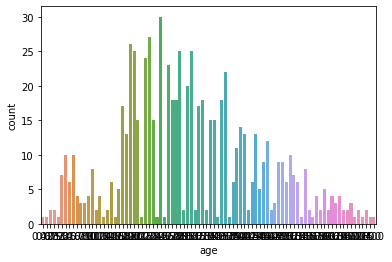

In [4]:
# Đếm số hành khách theo tuổi
sns.countplot(data=titanic, x='age');

In [5]:
# chia độ tuổi:
# tuổi <=12; tuổi từ 13 - 18; tuổi từ 19 - 25; tuổi từ 26 - 45; tuổi từ 46 - 60; tuổi > 60
titanic.loc[titanic['age']<=12,'do_tuoi'] = 'Tuổi <= 12'
titanic.loc[(titanic['age']>12) & (titanic['age']<=18),'do_tuoi'] = 'tuổi từ 13 - 18'
titanic.loc[(titanic['age']>18) & (titanic['age']<=25),'do_tuoi'] = 'tuổi từ 19 - 25'
titanic.loc[(titanic['age']>25) & (titanic['age']<=45),'do_tuoi'] = 'tuổi từ 26 - 45'
titanic.loc[(titanic['age']>45) & (titanic['age']<=60),'do_tuoi'] = 'tuổi từ 46 - 60'
titanic.loc[titanic['age']>60,'do_tuoi'] = 'Tuổi > 60'

In [6]:
do_tuoi_ser = titanic['do_tuoi'].value_counts(ascending=True)
do_tuoi_ser

Tuổi > 60           22
Tuổi <= 12          69
tuổi từ 13 - 18     70
tuổi từ 46 - 60     81
tuổi từ 19 - 25    162
tuổi từ 26 - 45    310
Name: do_tuoi, dtype: int64

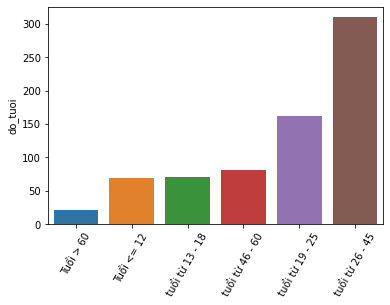

In [7]:
sns.barplot(x=do_tuoi_ser.index, y=do_tuoi_ser)
plt.xticks(rotation=60)
plt.show()

In [8]:
titanic = sns.load_dataset('titanic')

In [9]:
# chia độ tuổi:
# tuổi <=12; tuổi từ 13 - 18; tuổi từ 19 - 25; tuổi từ 26 - 45; tuổi từ 46 - 60; > tuổi >60
bins = [-np.inf, 12, 18, 25, 45, 60, np.inf]

# Bin labels
labels = ['tuổi <=12', 'tuổi từ 13 - 18', 'tuổi từ 19 - 25', 'tuổi từ 26 - 45', 
          'tuổi từ 46 - 60', 'tuổi >60']

titanic['do_tuoi'] = pd.cut(titanic['age'], bins, labels = labels)

In [10]:
do_tuoi_ser = titanic['do_tuoi'].value_counts(ascending=True)
do_tuoi_ser

tuổi >60            22
tuổi <=12           69
tuổi từ 13 - 18     70
tuổi từ 46 - 60     81
tuổi từ 19 - 25    162
tuổi từ 26 - 45    310
Name: do_tuoi, dtype: int64

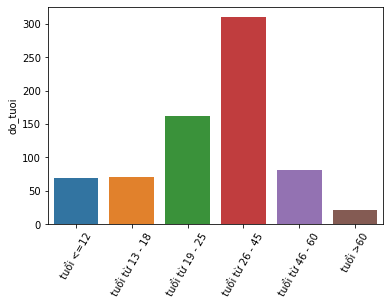

In [11]:
sns.barplot(x=do_tuoi_ser.index, y=do_tuoi_ser)
plt.xticks(rotation=60)
plt.show()